In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [16]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Select numerical columns for normalization
numerical_cols = df_market_data.columns[1:]

# Normalize the selected columns using StandardScaler
scaler = StandardScaler()
df_scaled = df_market_data.copy()  
df_scaled[numerical_cols] = scaler.fit_transform(df_market_data[numerical_cols])

# Display the new DataFrame with scaled data
df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.22392,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,-0.21173,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.37819,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,2.90585,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [21]:
# Copy the cryptocurrency names from the original data
crypto_names = df_market_data.index.tolist()

# Create a DataFrame with the scaled data and set the "coinid" column as index
df_scaled_with_names = df_scaled.copy()
df_scaled_with_names['coinid'] = crypto_names
df_scaled_with_names.set_index('coinid', inplace=True)

# Display sample data
df_scaled_with_names.head()

,coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coinid,,,,,,,,
0,bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Data.

In [23]:
# Create a list with the number of k-values from 1 to 11
# Create a list with k-values from 1 to 11
k_values = list(range(1, 12))
k_values


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [26]:
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

numerical_cols_for_clustering = df_scaled_with_names.select_dtypes(include=['number']).columns

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k)
    
    # Fit the model to the numerical columns only
    kmeans_model.fit(df_scaled_with_names[numerical_cols_for_clustering])
    
    # Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)


C:\Users\karen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [27]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_dict = {'k_values': k_values, 'inertia_values': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_data_df = pd.DataFrame({'k_values': k_values, 'inertia_values': inertia_values})

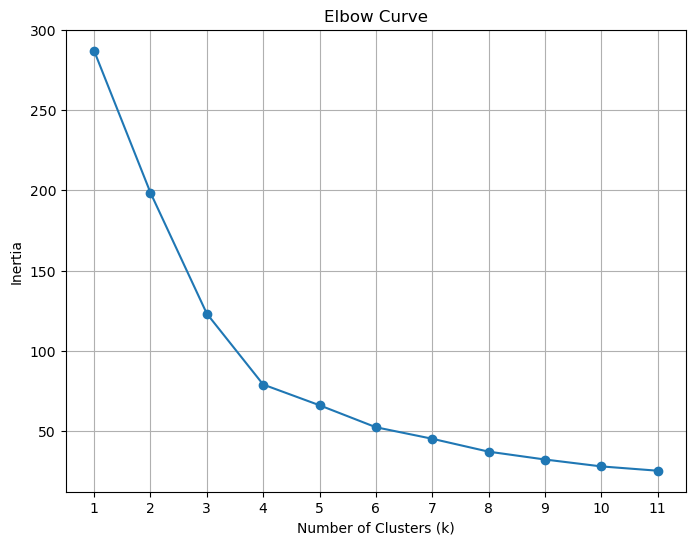

In [29]:
# Plot a line chart with all the inertia values computed with 
import matplotlib.pyplot as plt
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer: 4** 

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [32]:
# Initialize the K-Means model using the best value for k
best_k = 4
numerical_cols_for_clustering = df_scaled_with_names.select_dtypes(include=['number']).columns

In [33]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(df_scaled_with_names[numerical_cols_for_clustering])


C:\Users\karen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [34]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans_model.labels_

# Print the resulting array of cluster values.
cluster_labels

array([3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 3, 1, 1, 2, 1, 1, 1, 1])

In [35]:
# Create a copy of the DataFrame
df_copy = df_scaled_with_names.copy()
df_copy.head()

,coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coinid,,,,,,,,
0,bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [36]:
# Add a new column to the DataFrame with the predicted clusters
df_copy['predicted_cluster'] = cluster_labels

# Display sample data 
df_copy.head()

,coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_cluster
coinid,,,,,,,,,
0,bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
1,ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
2,tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
3,ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
4,bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3


In [37]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = df_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    color="predicted_cluster",
    hover_cols=["coinid"],
    title="Scatter Plot with Predicted Clusters",
    width=800,
    height=400
)

# Display the scatter plot
scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,predicted_cluster,coinid)

---

### Optimize Clusters with Principal Component Analysis.

In [40]:
# Create a PCA model instance and set `n_components=3`
numerical_cols_for_pca = df_copy.select_dtypes(include=['number']).columns
pca_model = PCA(n_components=3)

In [44]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
# Fit the PCA model to the numerical columns only
pca_model.fit(df_copy[numerical_cols_for_pca])

# Transform the data using the fitted PCA model
df_pca = pca_model.transform(df_copy[numerical_cols_for_pca])
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3'])

# Display the first few rows
df_pca.head(5)

,PC1,PC2,PC3
0,-1.585139,0.134394,0.545621
1,-1.322581,0.054494,1.115709
2,0.266335,-0.536409,-0.796946
3,0.257225,-0.592013,-0.646529
4,-2.952250,0.422372,1.267894


In [49]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance_ratios = pca_model.explained_variance_ratio_
print("Explained Variance Ratios:")
for i, ratio in enumerate(explained_variance_ratios):
    print(f"PC{i+1}: {ratio:.2f}")

explained_variance_ratios = pca_model.explained_variance_ratio_
total_explained_variance = sum(explained_variance_ratios)
total_explained_variance


Explained Variance Ratios:
PC1: 0.37
PC2: 0.32
PC3: 0.19


0.8844285111826466

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:0.88** 

In [51]:
# Create a new DataFrame with the PCA data.
df_pca_with_names = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3'])

# Creating a DataFrame with the PCA data
df_pca_with_names['coinid'] = crypto_names

# Copy the crypto names from the original data
crypto_names = df_scaled_with_names.index.tolist()

# Set the coinid column as index
df_pca_with_names.set_index('coinid', inplace=True)

# Display sample data
df_pca_with_names.head()

,PC1,PC2,PC3
coinid,,,
0,-1.585139,0.134394,0.545621
1,-1.322581,0.054494,1.115709
2,0.266335,-0.536409,-0.796946
3,0.257225,-0.592013,-0.646529
4,-2.952250,0.422372,1.267894


---

### Find the Best Value for k Using the PCA Data

In [52]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [56]:
# Create an empty list to store the inertia values
inertia_values = []


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
from sklearn.cluster import KMeans

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):  # Assuming k-values from 1 to 11
    # Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k)
    
    # Fit the model to the PCA-transformed data (df_market_data_pca)
    kmeans_model.fit(df_pca)
    
    # Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)

C:\Users\karen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [57]:
# Create a dictionary with the data for plotting the Elbow curve
elbow_data = {
    'k_values': range(1, 12),  # Assuming k-values from 1 to 11
    'inertia_values': inertia_values
}

# Create a DataFrame with the data for plotting the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame with the Elbow curve data
print(df_elbow)

    k_values  inertia_values
0          1      287.007838
1          2      196.268358
2          3      111.972027
3          4       43.205879
4          5       32.330891
5          6       24.347640
6          7       18.717792
7          8       16.237336
8          9       12.211615
9         10       10.541781
10        11        7.759700


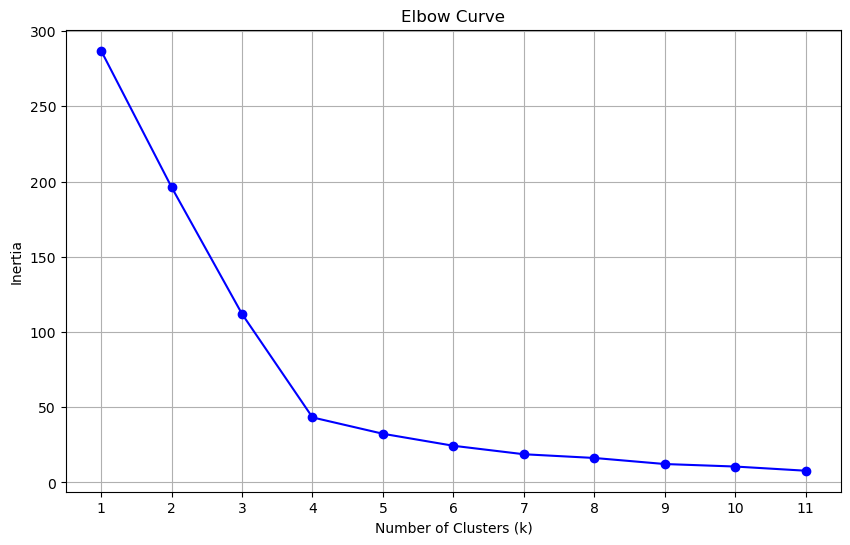

In [58]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.xticks(range(1, 12))
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [62]:
# Initialize the K-Means model with the best value for k
best_kmeans_model = KMeans(n_clusters=4)  # Assuming the best value for k is 4

# Fit the K-Means model to your data
best_kmeans_model.fit(df_elbow)

C:\Users\karen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [63]:
# Fit the K-Means model using the PCA data
kmeans = KMeans(n_clusters=best_k)

# Fit K-Means to the PCA-transformed data
kmeans.fit(df_pca)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Optionally, you can add the cluster labels back to your DataFrame
df_pca['cluster_label'] = cluster_labels

# Display sample data with c
df_pca.head

C:\Users\karen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<bound method NDFrame.head of          PC1       PC2       PC3  cluster_label
0  -1.585139  0.134394  0.545621              2
1  -1.322581  0.054494  1.115709              2
2   0.266335 -0.536409 -0.796946              1
3   0.257225 -0.592013 -0.646529              1
4  -2.952250  0.422372  1.267894              2
5  -1.975484  0.528219  0.670145              2
6  -1.671906  0.178423  2.718598              2
7  -1.539740  0.324517  1.497226              2
8  -1.347533 -0.132837  0.791063              2
9   0.040698 -0.802083 -0.465562              1
10  1.344822 -1.108679 -1.076912              1
11  0.272121 -0.545849 -0.814012              1
12  0.320673 -0.918019 -0.637918              1
13 -2.838740  1.895142  0.848863              2
14  0.143758 -0.442297 -0.274682              1
15 -0.862155 -0.757488  1.490647              2
16  1.378653 -0.776673 -0.754383              1
17  0.532658 -0.876910 -0.120776              1
18 -1.539433  0.352390  1.713933              2
19  0.2081

In [66]:
# Predict clusters using the PCA-transformed data
if 'cluster_label' in df_pca.columns:
    df_pca.drop(columns=['cluster_label'], inplace=True)

# Predict clusters using the PCA-transformed data
predicted_clusters = kmeans_model.predict(df_pca)

# Print the resulting array of cluster values
print(predicted_clusters)

[ 4  4  3  3  1  4 10  4  4  8  6  3  3  1  8  4  6  8  4  3  6  4  3  3
  0  3  8  6  4  7  8  8  2  4  9  0  5  6  8  3  3]


In [67]:
# Create a copy of the DataFrame with the PCA data
df_pca_copy = df_pca.copy()

# Add a new column 'predicted_cluster' to the DataFrame with the predicted clusters
df_pca_copy['predicted_cluster'] = predicted_clusters

# Display sample data from the DataFrame
df_pca_copy.head()

,PC1,PC2,PC3,predicted_cluster
0,-1.585139,0.134394,0.545621,4
1,-1.322581,0.054494,1.115709,4
2,0.266335,-0.536409,-0.796946,3
3,0.257225,-0.592013,-0.646529,3
4,-2.952250,0.422372,1.267894,1


In [68]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
# Scatter plot with hvPlot
scatter_plot = df_pca_copy.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="predicted_cluster",
    hover_cols=["crypto_name"],
    cmap='Category10',  # Colormap for different clusters
    title="Scatter Plot with Predicted Clusters"
)

# Show the scatter plot
scatter_plot

:NdOverlay   [predicted_cluster]
   :Scatter   [PC1]   (PC2)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [70]:
# Composite plot to contrast the Elbow curves

elbow_plot = df_elbow.hvplot.line(
    x='k_values',
    y='inertia_values',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia',
    title='Elbow Curve for Different Values of k',
    width=800,
    height=400,
    legend='top_left'
)

# Show the composite plot
elbow_plot

:Curve   [k_values]   (inertia_values)

In [71]:
# Composite plot to contrast the clusters
cluster_plot = df_pca_copy.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='predicted_cluster',
    hover_cols=['crypto_name'],
    title='Cluster Comparison',
    width=800,
    height=400,
    cmap='Category10',  # Colormap for different clusters
    legend='top_right'
)

# Show the composite plot
cluster_plot

:NdOverlay   [predicted_cluster]
   :Scatter   [PC1]   (PC2)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 